# Quantization Experiement CaffeNet 
Simple setup first

In [11]:
# global setup 
import sim_caffenet
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# run 2500 images from validation dataset
iterations = 5
batch_size = 10
LMDB_filename = '/media/jingyang/0E3519FE0E3519FE/ilsvrc12_val_lmdb/'

# run floating point CaffeNet (ground truth)
# so that we can get the range, and ground truth accuracy
floating_point_accuracy, floating_point_blobs_range, floating_point_weights_range, \
    floating_point_biases_range, kernels_name = \
    sim_caffenet.sim_floating_point_caffenet(LMDB_filename, batch_size=batch_size, 
                                             iterations=iterations, verbose=False)

Floating point CaffNet starts inference...
Batch 0/5: Top-1 Acc: 70.00%, Top-5 Acc: 90.00%


## 1. Uniform quantization scheme
In this exploration, weights, biases, blobs share the same quantization scheme. We will adopt 2 different quantization schemes: aggressive and conservative respectively.

In [5]:
uniform_bit_width = range(5, 7) # 5 - 18

# conservative round strategy
round_method = 'FLOOR' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_uniform_accuracy = {}
for b in uniform_bit_width:
    print 'Simulate conservative uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    conservative_uniform_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
    

# aggressive round strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_uniform_accuracy = {}
for b in uniform_bit_width:
    print 'Simulate aggressive uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    aggressive_uniform_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)

Simulate conservative uniform bit 5...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative uniform bit 6...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate aggressive uniform bit 5...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 30.00%, Top-5 Acc: 60.00%
Simulate aggressive uniform bit 6...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 30.00%, Top-5 Acc: 90.00%


- Plot the diagram Top1 Error Rate and Top5 Error Rate

Ground Truth (floating point): Top1 Acc: 0.660000; Top5 Acc: 0.780000


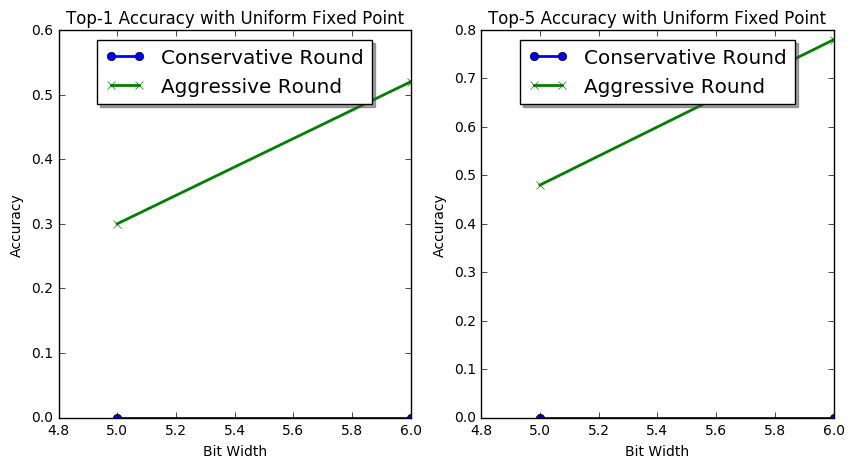

In [15]:
print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())
plt.figure(figsize=(10, 5))
## Top1
plt.subplot(1, 2, 1)
plt.plot(uniform_bit_width, [conservative_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'o-',
         linewidth=2, label='Conservative Round')
plt.plot(uniform_bit_width, [aggressive_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'x-',
        linewidth=2, label='Aggressive Round')
plt.title('Top-1 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## Top5
plt.subplot(1, 2, 2)
plt.plot(uniform_bit_width, [conservative_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'o-',
         linewidth=2, label='Conservative Round')
plt.plot(uniform_bit_width, [aggressive_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'x-',
         linewidth=2, label='Aggressive Round')
plt.title('Top-5 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## 2. Explore the weights and biases quantization impact
The kernels (weights and biases) affect the final storage on the chip.

In [25]:
blobs_bit_width = 16
kernels_bit_width = range(7, 9) # 5 ~ 16

# conservative round strategy
round_method = 'FLOOR' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_kernels_accuracy = {}
for b in kernels_bit_width:
    print 'Simulate conservative kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    conservative_kernels_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
    
# aggressive round strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_kernels_accuracy = {}
for b in kernels_bit_width:
    print 'Simulate aggressive kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    aggressive_kernels_accuracy[b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)

Simulate conservative kernels bit 7 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative kernels bit 8 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 10.00%, Top-5 Acc: 30.00%
Simulate aggressive kernels bit 7 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 60.00%, Top-5 Acc: 90.00%
Batch 1/5: Top-1 Acc: 60.00%, Top-5 Acc: 80.00%
Batch 2/5: Top-1 Acc: 80.00%, Top-5 Acc: 90.00%
Batch 3/5: Top-1 Acc: 50.00%, Top-5 Acc: 60.00%
Batch 4/5: Top-1 Acc: 60.00%, Top-5 Acc: 80.00%
Simulate aggressive kernels bit 8 with blob bit 16...
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 60.00%, Top-5 Acc: 90.00%
Batch 1/5: Top-1 Acc: 60.00%, Top-5 Acc: 80.00%
Batch 2/5: Top-1 Acc: 60.00%, Top-5 Acc: 90.00%
Batch 3/5: Top-1 Acc: 50.00%, Top-5 Acc: 60.00%
Batch 4/5: Top-1 Acc: 60.00%, Top-5 Acc: 80.00%


Ground Truth (floating point): Top1 Acc: 0.660000; Top5 Acc: 0.780000


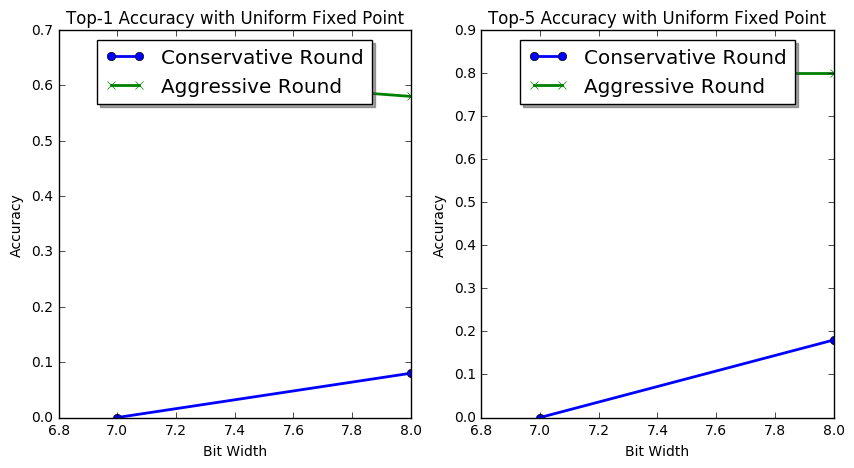

In [26]:
print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())
plt.figure(figsize=(10, 5))
## Top1
plt.subplot(1, 2, 1)
plt.plot(kernels_bit_width, [conservative_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 'o-',
         linewidth=2, label='Conservative Round')
plt.plot(kernels_bit_width, [aggressive_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 'x-',
        linewidth=2, label='Aggressive Round')
plt.title('Top-1 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## Top5
plt.subplot(1, 2, 2)
plt.plot(kernels_bit_width, [conservative_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 'o-',
         linewidth=2, label='Conservative Round')
plt.plot(kernels_bit_width, [aggressive_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 'x-',
         linewidth=2, label='Aggressive Round')
plt.title('Top-5 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## 3. Explore the sensitivity of different layers
In this experiement, we will change the kernel width individually. We will see how the final prediction accuracy varies.

In [27]:
blobs_bit_width = 16
sensitive_kernel_bit_width = range(7, 9) # 5 ~ 16
default_kernel_bit_width = 16

# default kernel bit width
default_kernel = {}
for k in kernels_name:
    default_kernel[k] = default_kernel_bit_width

# conservative round strategy
round_method = 'FLOOR' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_senstive_accuracy = {}
for k in kernels_name:
    conservative_senstive_accuracy[k] = {}
    for b in kernels_bit_width:
        print 'Simulate conservative kernels[%s] bit %d with blob bit %d...' % (k, b, blobs_bit_width)
        cur_kernel_bit_width = default_kernel.copy()
        cur_kernel_bit_width[k] = b
        print cur_kernel_bit_width
        bit_width=dict(blobs=blobs_bit_width, weights=cur_kernel_bit_width, biases=cur_kernel_bit_width) # kernel bit width
        conservative_senstive_accuracy[k][b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                            blobs_range=floating_point_blobs_range, \
                                             weights_range=floating_point_weights_range, \
                                              biases_range=floating_point_biases_range, batch_size=batch_size, \
                                              iterations=iterations, round_method=round_method, \
                                                round_strategy=round_strategy, verbose=False)
    
# aggressive round strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_senstive_accuracy = {}
for k in kernels_name:
    aggressive_senstive_accuracy[k] = {}
    for b in kernels_bit_width:
        print 'Simulate aggressive kernels[%s] bit %d with blob bit %d...' % (k, b, blobs_bit_width)
        cur_kernel_bit_width = default_kernel.copy()
        cur_kernel_bit_width[k] = b
        print cur_kernel_bit_width
        bit_width=dict(blobs=blobs_bit_width, weights=cur_kernel_bit_width, biases=cur_kernel_bit_width) # kernel bit width
        aggressive_senstive_accuracy[k][b] = sim_caffenet.sim_fixed_point_caffenet(LMDB_filename, bit_width=bit_width, \
                                            blobs_range=floating_point_blobs_range, \
                                             weights_range=floating_point_weights_range, \
                                              biases_range=floating_point_biases_range, batch_size=batch_size, \
                                              iterations=iterations, round_method=round_method, \
                                                round_strategy=round_strategy, verbose=False)

Simulate conservative kernels[conv1] bit 7 with blob bit 16...
{'fc6': 16, 'fc7': 16, 'fc8': 16, 'conv3': 16, 'conv2': 16, 'conv1': 7, 'conv5': 16, 'conv4': 16}
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 30.00%, Top-5 Acc: 60.00%
Simulate conservative kernels[conv1] bit 8 with blob bit 16...
{'fc6': 16, 'fc7': 16, 'fc8': 16, 'conv3': 16, 'conv2': 16, 'conv1': 8, 'conv5': 16, 'conv4': 16}
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 50.00%, Top-5 Acc: 90.00%
Simulate conservative kernels[conv2] bit 7 with blob bit 16...
{'fc6': 16, 'fc7': 16, 'fc8': 16, 'conv3': 16, 'conv2': 7, 'conv1': 16, 'conv5': 16, 'conv4': 16}
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative kernels[conv2] bit 8 with blob bit 16...
{'fc6': 16, 'fc7': 16, 'fc8': 16, 'conv3': 16, 'conv2': 8, 'conv1': 16, 'conv5': 16, 'conv4': 16}
Fixed point CaffeNet starts inference...
Batch 0/5: Top-1 Acc: 30.00%, Top-5 Acc: 40.00%
Si

- Print the accuracy results

In [28]:
print 'Conservative sensitive analysis'
for k, v in conservative_senstive_accuracy.items():
    for bw, acc in v.items():
        print 'kernel[%s] @ bw = %d: top1 = %f; top5 = %f' % \
            (k, bw, acc.mean(axis=1)[0], acc.mean(axis=1)[1])

print ''            
print 'Aggressive sensitive analysis'
for k, v in aggressive_senstive_accuracy.items():
    for bw, acc in v.items():
        print 'kernel[%s] @ bw = %d: top1 = %f; top5 = %f' % \
            (k, bw, acc.mean(axis=1)[0], acc.mean(axis=1)[1])

Conservative sensitive analysis
kernel[fc6] @ bw = 8: top1 = 0.520000; top5 = 0.720000
kernel[fc6] @ bw = 7: top1 = 0.100000; top5 = 0.180000
kernel[fc7] @ bw = 8: top1 = 0.600000; top5 = 0.780000
kernel[fc7] @ bw = 7: top1 = 0.580000; top5 = 0.780000
kernel[fc8] @ bw = 8: top1 = 0.660000; top5 = 0.800000
kernel[fc8] @ bw = 7: top1 = 0.620000; top5 = 0.800000
kernel[conv3] @ bw = 8: top1 = 0.060000; top5 = 0.180000
kernel[conv3] @ bw = 7: top1 = 0.000000; top5 = 0.000000
kernel[conv2] @ bw = 8: top1 = 0.180000; top5 = 0.380000
kernel[conv2] @ bw = 7: top1 = 0.000000; top5 = 0.060000
kernel[conv1] @ bw = 8: top1 = 0.400000; top5 = 0.580000
kernel[conv1] @ bw = 7: top1 = 0.220000; top5 = 0.340000
kernel[conv5] @ bw = 8: top1 = 0.520000; top5 = 0.740000
kernel[conv5] @ bw = 7: top1 = 0.360000; top5 = 0.580000
kernel[conv4] @ bw = 8: top1 = 0.520000; top5 = 0.700000
kernel[conv4] @ bw = 7: top1 = 0.040000; top5 = 0.120000

Aggressive sensitive analysis
kernel[fc6] @ bw = 8: top1 = 0.640000